## 붓꽃 품종 분류

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib notebook
from IPython.display import display

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print('iris_dataset의 키:\n',iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris_dataset['DESCR'][:193]+'\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [4]:
print('target_name : ',iris_dataset['target_names'])

target_name :  ['setosa' 'versicolor' 'virginica']


In [5]:
print('column_name:\n',iris_dataset['feature_names'])

column_name:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [7]:
len(X_train),len(X_test)

(112, 38)

In [9]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


In [15]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=a8e731d01110f8e1f1c1504e48e1f47fac04e4c41263a74da8b18138ba404afd
  Stored in directory: c:\users\playdata\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


### 데이터 파악하기

In [18]:
import mglearn

<IPython.core.display.Javascript object>


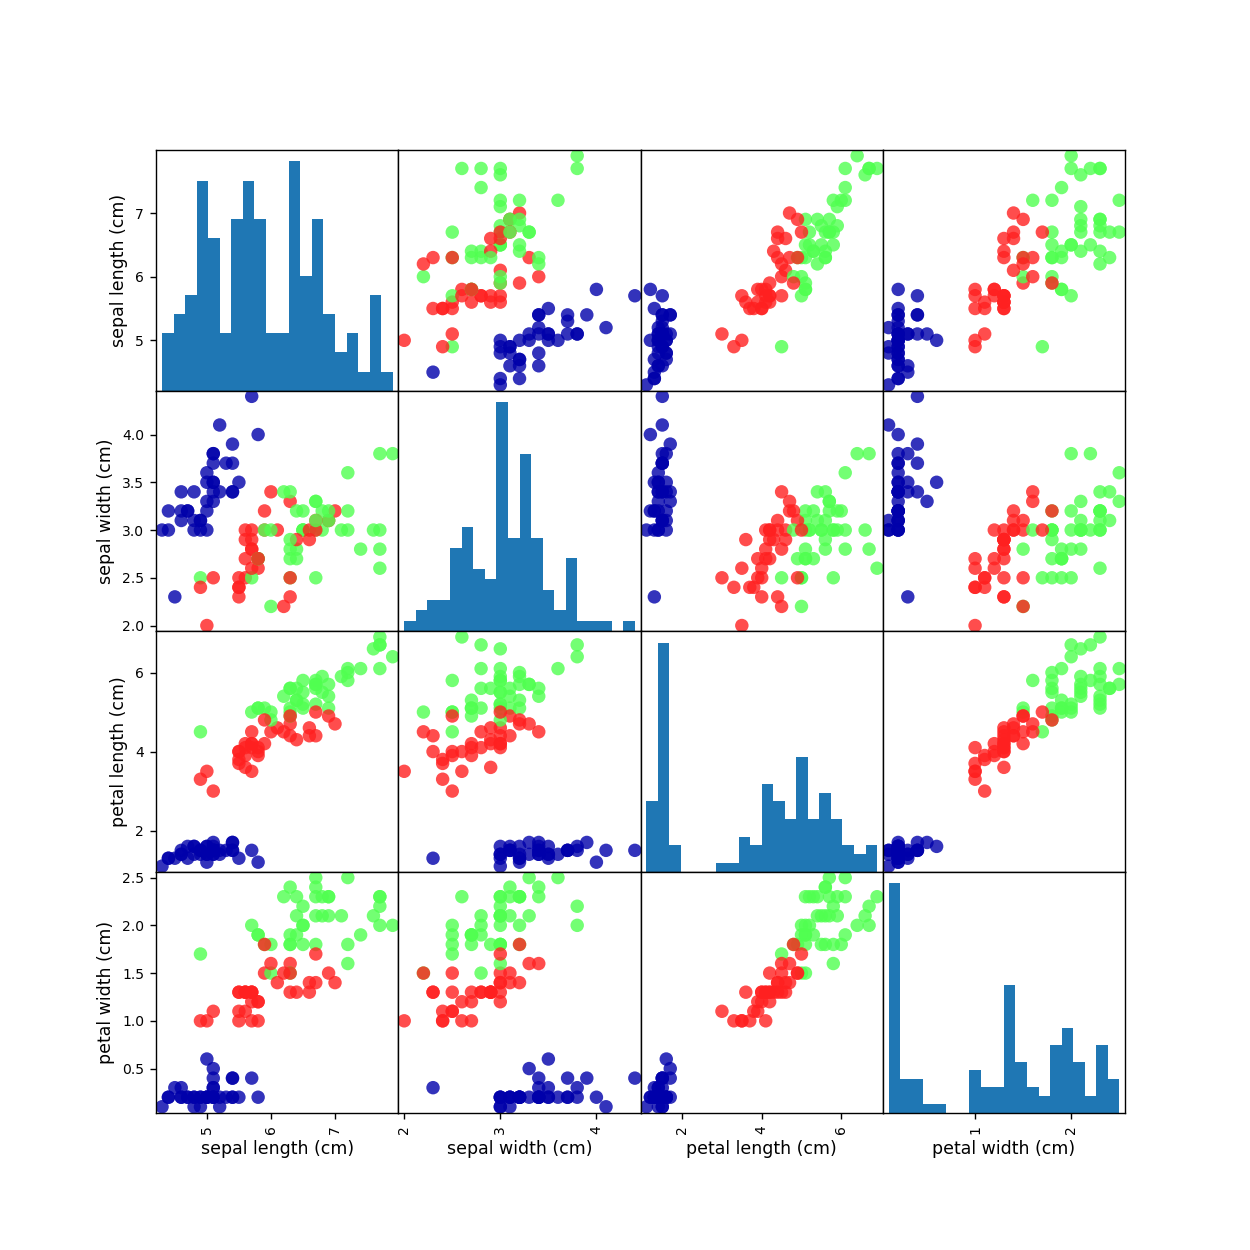

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275912A5588>,
      dtype=object)

In [20]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10),marker ='o',hist_kwds={'bins':20},s=60,alpha=0.8,cmap=mglearn.cm3)

### 모델만들기

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
X_new = np.array([[5,2.9,1,0.2]])
print('X_new.shape:',X_new.shape)

X_new.shape: (1, 4)


In [26]:
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


### 모델평가하기

In [27]:
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [29]:
print('테스트 정확도 :{:.2f}'.format(np.mean(y_pred==y_test)))

테스트 정확도 :0.97
